<div style="text-align: center;">
    <h1>"A Dive into Alcohol": 
        Screening Drunk Behavior in Zebrafish</h1>
    <h5>by Caique Fabris</h5>
</div>

![](images/zebrafish.jpg)

<div style="text-align: center;">
    <h3>Introduction</h3>
</div>

<div style="text-align: justify;">
Catchy title, right? I know. You might be wondering "why would someone get a fish drunk?". Well, for starters, getting people drunk might be more common and easier on a daily-basis, but doing so in a Lab is a bit harder, with that little extra ethical perk. That is why Translational Biosciences often recurs to animal models. You are probably familiar with the term "lab rat". You might be surprised to find out that there are many animal models, from "lab flies" to "lab slugs". But why in the world would we have a "lab fish"?
</div>

When it comes to Translational Neuroscience, these little guys are practically people. We share about 70% of our genome with zebrafish, and a fair amount of our neuronal circuits too. Serotonin, Dopamine -they are all there, and the pathways are remarkably similar to ours. Plus, you can buy them cheaply at that aquarium store right in the corner.

<div style="text-align: justify;">
While "lab fish" is a new trend, the relationship between humans and alcohol, on the other hand, is as old as it is unique. As a matter of fact, theory has it that it predates our own species. Back in the African savannas, mature fruits on the ground would naturally ferment, producing alcohol. This volatile molecule would have easily traveled through the air, eventually making its way to the noses of early hominids searching for food. And yes, natural selection worked its magic by favoring those better equipped to detect its punchy scent. After all, finding fermented fruits could have been a source of calories -or at the very least, an interesting experience. Fast forward to today, and alcohol is quite present in human daily life, making some people happy and some other people very very... Well, not happy.
</div>

<div style="text-align: justify;">
Despite its long standing presence in human culture, our understanding of alcohol's effect is still cloudy. You see, alcohol is a big mess -not only socioeconomically, but pharmacologically too. After entering the body, it changes a whole bunch of things, some directly and others indirectly, making it hard to grasp its big-picture in detail. But we can start with the question: "why do people drink?". I mean, we are not in the savannas anymore, right? We don't need the scent of alcohol to guide us to the fruit section in the supermarket. So, really, why do we drink? Hopefully, we can tackle this subject by checking how alcohol alters zebrafish behavior.
</div>

<div style="text-align: justify;">
In this notebook, we will explore how alcohol influences zebrafish behaviour exposed under different time and dose scenarios. The tests aim to evaluate fish decision making, anxiety-like behavior, exploratory activity, and physical endurance. For this, we have applied some well-known assays in a new way: a tiered-test battery. "What is a tiered-test battery?" I'm glad you asked. Instead of using one fish per test, we use the same fish for all tests, sequentially. This allow us to gain insights into individual fish personallity while reducing effort and sample size. Russel and Burch would be proud!
</div>

### Libraries

In [1]:
# Libraries 📚 
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from itertools import combinations
import itertools

# Data Viz 📈
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Settings ⚙️
pd.set_option('display.max_columns', None)

### Data Importing

In [2]:
data = pd.read_csv('battery_suite_1.csv')

In [3]:
data = data.drop(columns='Unnamed: 0')

In [4]:
data = data.set_index('fish_id')

**About the Dataset**

It covers several behavioural endpoints for zebrafish exposed under three different alcohol treatments (0.0%, 0.5% and 1%) during three different exposure times (1 hour, 24 hours and 96 hours). Each row of the dataset is one of the 414 individual fish used in total, being each column an endpoint for the fish. Not only behavioural data is present, but also the exact time the fish started the battery test, biometric and physiological data, as well as some info regarding the water. For a detailed in-depth documentation, please, refer to the proper file in GitHub.

### Functions

In [5]:
def check_normality(df, cols):
    """
    Perform Shapiro-Wilk test for normality on specified columns of a DataFrame.
    
    Parameters:
    df : pandas.DataFrame
        The DataFrame containing the data.
    cols : str or list of str
        The column(s) to check for normality.
    """
    # If a single column is passed, convert to list for uniform processing
    if isinstance(cols, str):
        cols = [cols]    
    # Iterate through the columns and perform Shapiro-Wilk test
    for col in cols:
        stat, p_value = shapiro(df[col])
        print(f"Shapiro-Wilk Test for '{col}':")
        print(f"  Test statistic: {stat:.3f}, p-value: {p_value:.3f}")        
        # Interpretation of p-value
        if p_value > 0.05:
            print(f"  '{col}' appears to be normally distributed.\n")
        else:
            print(f"  '{col}' does not appear to be normally distributed.\n")



def get_spearman(df1, df2, df3, cols):
    """
    Generates Spearman correlation heatmaps for three different subsets of data.
    
    Parameters:
    df1, df2, df3 (DataFrame): The dataframes for different subsets (e.g., box1h, box24h, box96h).
    cols (list): List of column names to calculate the correlation on.
    
    Returns:
    None: Displays the Spearman correlation heatmaps for each subset.
    """
    # Plotting for box1h
    plt.figure(figsize=(8, 6))
    sns.heatmap(df1[cols].corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5, 
                annot_kws={'size': 12}, square=True)
    plt.title('Spearman Correlation Heatmap for box1h')
    plt.show()
    # Plotting for box24h
    plt.figure(figsize=(8, 6))
    sns.heatmap(df2[cols].corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5, 
                annot_kws={'size': 12}, square=True)
    plt.title('Spearman Correlation Heatmap for box24h')
    plt.show()
    # Plotting for box96h
    plt.figure(figsize=(8, 6))
    sns.heatmap(df3[cols].corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5, 
                annot_kws={'size': 12}, square=True)
    plt.title('Spearman Correlation Heatmap for box96h')
    plt.show()

---

### Summary of Dataframes

**data**: The initial dataset containing all data for the three tests applied sequentially

**box**: A dataset containing all useful data for the Light-Dark Box test.\
**box1h, box24h, box96h**: Subsets for dose-dependent analysis in Light-Dark Box test\
**box0_0, box0_5, box1_0**: Subsets for time-dependent analysis in Light-Dark Box test

---

<div style="text-align: center;">
    <h3>The Light-Dark Box</h3>
</div>

![](images/light_dark_box.jpg)

<div style="text-align: justify;">
This test is pretty good at assessing anxiety, decision-making, and exploratory activity. Let’s face it —nobody likes change, right? Fish are no exception. When placed in unfamiliar surroundings, they exhibit alarmed, anxiety-like behavior. But to understand this test, you need to also think like a fish. Zebrafish are diurnal creatures, much like their predators, which rely heavily on vision to hunt. This makes their behavior in light and dark environments particularly telling. When anxiety strikes, it’s easy to understand why a fish might prefer the safety of the dark side of a tank. And if they’re truly stressed, they’ll spend more time seeking refuge there.
</div>

<div style="text-align: justify;">
The test uses a special tank divided into two portions: one brighter and one darker, with a central compartment where the fish is placed at the beginning. As the test begins, the fish, much like a Jedi, faces a dilemma: should it go to the dark side or follow the light? This seemingly simple choice reveals a lot about their anxiety levels. Frequent switches between compartments reflect their exploratory tendencies and curiosity, while time spent in the light zone signals their willingness to take risks by exposing themselves to potential predators. Ultimately, this test evaluates how the fish navigates the delicate balance between curiosity and caution.
</div>

In [6]:
# Let's filter useful data for this particular test
box = data[['group', 'treatment', 'exposure', 'datetime', 'latency', 'first_choice', 'num_changes', 'time_bright', 'mtpc', 'lt', 'ls', 'wt', 'Kc', 'sex', 'blood_sugar',
       'conductivity', 'pH']]

In [7]:
# we check how normally distributed the data is for this test, as it will impact further analysis
check_normality(box, ['latency', 'num_changes', 'time_bright', 'mtpc'])

Shapiro-Wilk Test for 'latency':
  Test statistic: 0.385, p-value: 0.000
  'latency' does not appear to be normally distributed.

Shapiro-Wilk Test for 'num_changes':
  Test statistic: 0.915, p-value: 0.000
  'num_changes' does not appear to be normally distributed.

Shapiro-Wilk Test for 'time_bright':
  Test statistic: 0.949, p-value: 0.000
  'time_bright' does not appear to be normally distributed.

Shapiro-Wilk Test for 'mtpc':
  Test statistic: 0.355, p-value: 0.000
  'mtpc' does not appear to be normally distributed.



Since data is too complex, we are going to break our analysis into two different problem-questions:
 1) Effects of ethanol in a dose-dependent manner, meaning how different treatments (0.0%, 0.5% and 1%) influenced zebrafish behavior.
 2) Effects of ethanol in a time-dependent manner, meaning how different exposures (1h, 24, 96h) might affect the influence of alcohol, if there is any.


In [8]:
# let's create some subsets for that

# dose-dependent subsets
box1h = box.loc[box['exposure'] == 1]
box24h = box.loc[box['exposure'] == 24]
box96h = box.loc[box['exposure'] == 96]

# time-dependent subsets
box0_0 = box.loc[box['treatment'] == 0.0]
box0_5 = box.loc[box['treatment'] == 0.5]
box1_0 = box.loc[box['treatment'] == 1.0]

Let's start exploring our data by checking how changes in the patterns of each parameter correlates to each other. For this, we are going to run a Spearman correlation test (since data is non-parametric) between all of them, to be visualized in a Heatmap. This will helps us get a general overview of the test as a whole.

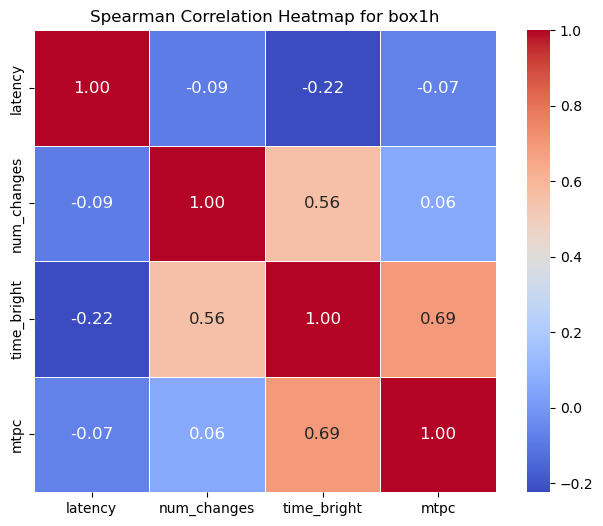

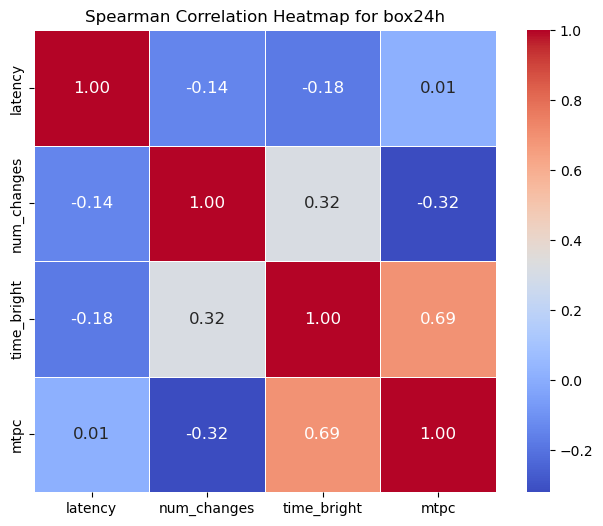

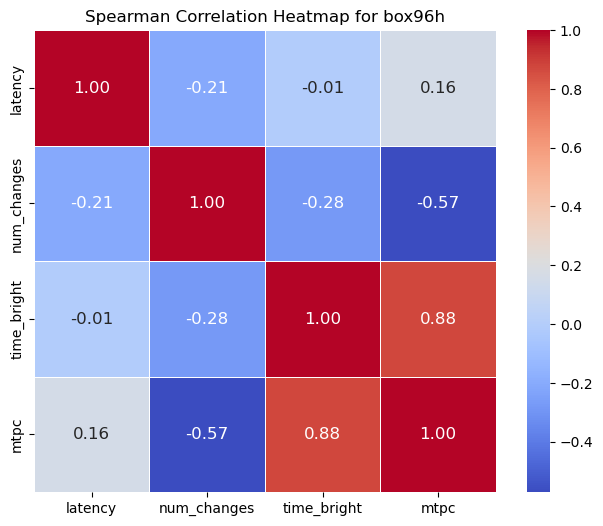

In [9]:
get_spearman(box1h, box24h, box96h, ['latency', 'num_changes', 'time_bright', 'mtpc'])

Some trends are already starting to show here, right? I don't know about you, I am very excited! First, let's bring our attention to how the relation between time in the bright environment and number of changes between environment shifts from shorter to longer exposure times. What is happening here? well, in 1h exposures, the more fish stood in the bright environment, the more they changed  environments. This high activity probably correlates with a higher curiosity and some bravery to be exposed. Now, as we increase exposure to ethanol, we shift this correlation, to the point that, in higher exposures, fish that stood in the bright for longer, actually changed less. Why is that? Well, they are drunk, that's why. They are chilling there.

In shorter, fancier terms, there is a positive correlation between phototaxia and activity in 1h that is shifted in longer exposures. Fish became more attracted to light, meaning they became less afraid, but their activity decreased.

This tendency also becomes clear when you look at the evolution of the mean time spent in the bright with the number of changes. It started negligebly weak for the shortest exposure, meaning that fish who wanted to explore were kinda indifferent to light, but decreased significantly across bigger exposures. That means that fish who did actually explore the tank in higher alcohol exposures were more likely to avoid the bright side. Probably their fear was bigger than their drunkness.

#### Latency

Let's take a closer look at the test parameters now. As soon as the fish entered the box, how long did it take to choose between dark or bright side?

In [10]:
# first we make sure all fish did choose between light or dark
box.latency.isna().sum()

0

In [11]:
# If we get the mean values, we can already see some patterns
box.groupby('group')['latency'].mean().reset_index().round(2)

,group,latency
0,01h 0.0%,25.64
1,01h 0.5%,60.31
2,01h 1.0%,39.88
3,24h 0.0%,13.60
4,24h 0.5%,57.00
5,24h 1.0%,2.43
6,96h 0.0%,9.19
7,96h 0.5%,28.94
8,96h 1.0%,1.86


In [12]:
# but if we check the median, we notice that a lot of values are zeros
# that is because most fish instantly left the initial compartment
box.groupby('group')['latency'].median().reset_index().round(2)

,group,latency
0,01h 0.0%,0.0
1,01h 0.5%,0.0
2,01h 1.0%,0.0
3,24h 0.0%,0.0
4,24h 0.5%,2.0
5,24h 1.0%,0.0
6,96h 0.0%,0.0
7,96h 0.5%,0.0
8,96h 1.0%,0.0


In [13]:
# which makes me wonder what happens if we check the fish that actually made a thoughtful decision
box_lat = box.loc[box.latency != 0]

In [14]:
# mean time of latency and number of fishes that didn't instantly choose between dark or bright
box_lat.groupby('group')['latency'].agg(['median', 'mean', 'size']).reset_index().round(2)

,group,median,mean,size
0,01h 0.0%,81.0,119.67,3
1,01h 0.5%,150.0,193.00,5
2,01h 1.0%,80.5,106.33,6
3,24h 0.0%,25.0,68.00,3
4,24h 0.5%,15.5,106.88,8
5,24h 1.0%,10.0,8.50,4
6,96h 0.0%,22.5,36.75,4
7,96h 0.5%,18.0,154.33,3
8,96h 1.0%,13.0,13.00,2


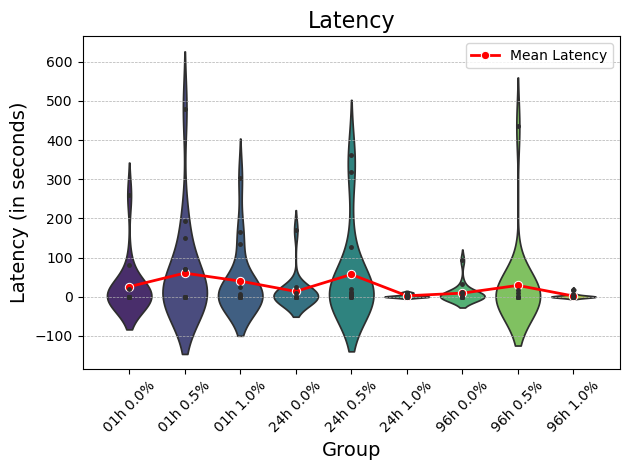

In [15]:
latency_means = box.groupby('group')['latency'].mean().reset_index()

sns.violinplot(data=box, x='group', y='latency', palette='viridis', hue='group', inner='point')
sns.lineplot(data=latency_means, x='group', y='latency', color='red', marker='o', label='Mean Latency', linewidth=2)

plt.title('Latency', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Latency (in seconds)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()

It is possible to see that alcohol increases time to choose at moderate concentrations but decreases it at higher time-dose exposures. If we check the correlation heatmap, we will notice that latency always have a negative correlation with number of changes (activity and exploration), so it might be safe to say that fish taking more time to choose are being precautious. Having this in mind, it becomes quite interesting to see how ethanol flattens the violins at higher doses in 24h and 96h, meaning those fish are not really thinking to choose, right? Gosh, imagine them behind a wheel.

In [16]:
# Pairwise Mann-Whitney U tests
groups = box['group'].unique()  # Unique group names
pairs = itertools.combinations(groups, 2)  # Pairwise combinations of groups

# Loop through each pair and run Mann-Whitney U test
for pair in pairs:
    group1_data = box[box['group'] == pair[0]]['latency']  # Replace 'latency' with your column of interest
    group2_data = box[box['group'] == pair[1]]['latency']  # Replace 'latency' with your column of interest
    
    # Mann-Whitney U Test
    stat, p = mannwhitneyu(group1_data, group2_data)
    
    print(f"Comparison: {pair[0]} vs {pair[1]} -> p-value: {p:.3f}")

Comparison: 01h 0.0% vs 01h 0.5% -> p-value: 0.522
Comparison: 01h 0.0% vs 01h 1.0% -> p-value: 0.398
Comparison: 01h 0.0% vs 24h 0.0% -> p-value: 0.878
Comparison: 01h 0.0% vs 24h 0.5% -> p-value: 0.133
Comparison: 01h 0.0% vs 24h 1.0% -> p-value: 0.976
Comparison: 01h 0.0% vs 96h 0.0% -> p-value: 0.978
Comparison: 01h 0.0% vs 96h 0.5% -> p-value: 0.812
Comparison: 01h 0.0% vs 96h 1.0% -> p-value: 0.513
Comparison: 01h 0.5% vs 01h 1.0% -> p-value: 0.947
Comparison: 01h 0.5% vs 24h 0.0% -> p-value: 0.369
Comparison: 01h 0.5% vs 24h 0.5% -> p-value: 0.481
Comparison: 01h 0.5% vs 24h 1.0% -> p-value: 0.521
Comparison: 01h 0.5% vs 96h 0.0% -> p-value: 0.461
Comparison: 01h 0.5% vs 96h 0.5% -> p-value: 0.346
Comparison: 01h 0.5% vs 96h 1.0% -> p-value: 0.188
Comparison: 01h 1.0% vs 24h 0.0% -> p-value: 0.312
Comparison: 01h 1.0% vs 24h 0.5% -> p-value: 0.462
Comparison: 01h 1.0% vs 24h 1.0% -> p-value: 0.472
Comparison: 01h 1.0% vs 96h 0.0% -> p-value: 0.422
Comparison: 01h 1.0% vs 96h 0.5

#### First Choice

Did ethanol have any influence on which environment the fish chose to explore first?

In [17]:
# We keep in mind that this fella here didn't choose anything
box.first_choice.isna().sum()

1

In [18]:
# Let's get a view of fish first choice, in percentage
first_choice_table = round(box.groupby('group')['first_choice'].value_counts(normalize=True).unstack().fillna(0) * 100, 2)
first_choice_table

first_choice,bright,dark
group,,
01h 0.0%,78.57,21.43
01h 0.5%,40.00,60.00
01h 1.0%,43.75,56.25
24h 0.0%,46.67,53.33
24h 0.5%,73.33,26.67
24h 1.0%,100.00,0.00
96h 0.0%,50.00,50.00
96h 0.5%,93.75,6.25
96h 1.0%,85.71,14.29


- $H_0:$ There is no association between group and first choice.

- $H_1:$ There is an association between group and first choice.

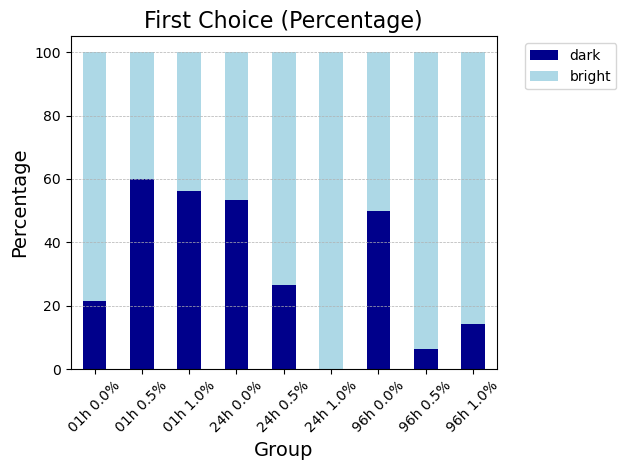

In [19]:
first_choice_table = first_choice_table[['dark', 'bright']]
first_choice_table.plot(kind='bar', stacked=True, color=['darkblue', 'lightblue'])

plt.title('First Choice (Percentage)', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)

plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', axis='y', linewidth=0.5)
plt.tight_layout()

plt.show()

#### Number of Changes

What happened to their exploratory activity and curiosity while drunk?

In [20]:
box.groupby('group')['num_changes'].agg(['median', 'mean', 'max']).round(2)

,median,mean,max
group,,,
01h 0.0%,24.5,25.57,66.0
01h 0.5%,25.5,23.44,60.0
01h 1.0%,18.5,27.12,108.0
24h 0.0%,20.0,18.93,35.0
24h 0.5%,26.0,21.27,45.0
24h 1.0%,28.0,27.21,43.0
96h 0.0%,17.0,15.44,33.0
96h 0.5%,32.0,27.44,47.0
96h 1.0%,10.0,12.57,36.0


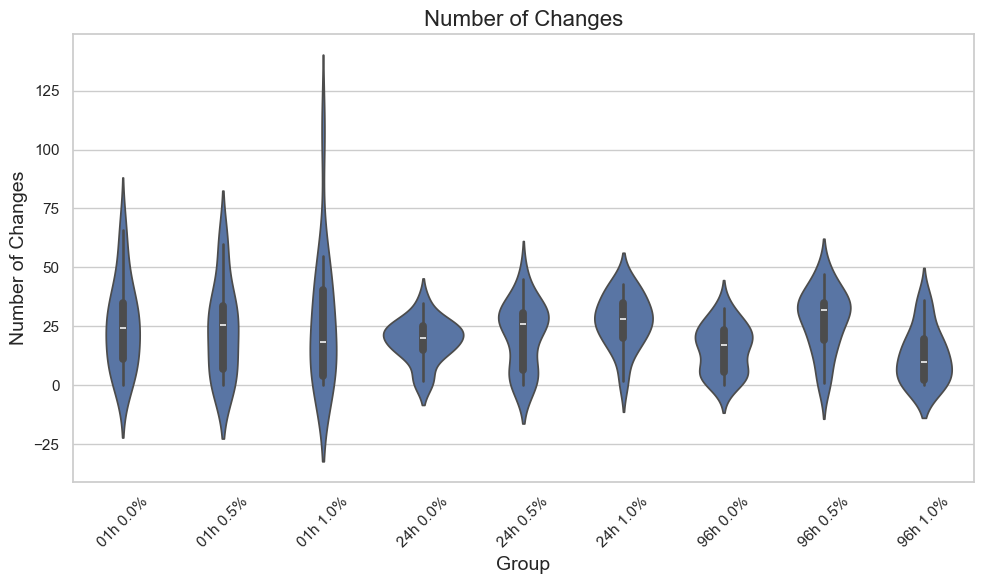

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.violinplot(x='group', y='num_changes', data=box)

plt.title('Number of Changes', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Number of Changes', fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Time in the Bright

In [22]:
box.groupby('group')['time_bright'].agg(['median', 'mean', 'max']).round(2)

,median,mean,max
group,,,
01h 0.0%,122.0,145.57,421.0
01h 0.5%,142.0,156.31,491.0
01h 1.0%,159.0,176.69,360.0
24h 0.0%,97.0,104.67,203.0
24h 0.5%,179.0,188.20,432.0
24h 1.0%,243.5,261.21,435.0
96h 0.0%,117.5,166.25,461.0
96h 0.5%,268.0,269.06,453.0
96h 1.0%,439.0,367.93,480.0


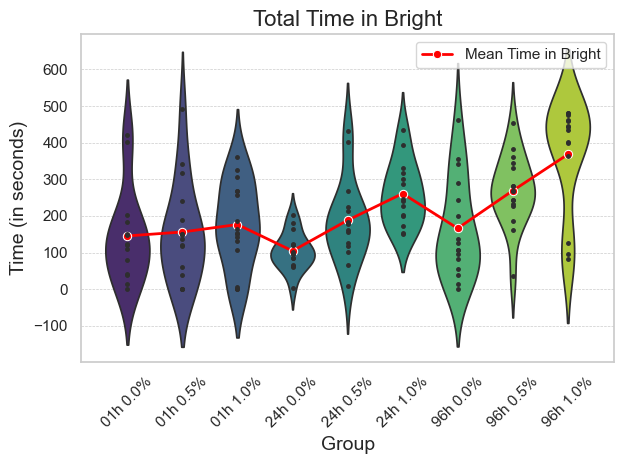

In [23]:
time_bright_means = box.groupby('group')['time_bright'].mean().reset_index()

sns.violinplot(data=box, x='group', y='time_bright', palette='viridis', hue='group', inner='point')
sns.lineplot(data=time_bright_means, x='group', y='time_bright', color='red', marker='o', label='Mean Time in Bright', linewidth=2)

plt.title('Total Time in Bright', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Time (in seconds)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()

#### Mean Time per Change

In [24]:
box.groupby('group')['mtpc'].agg(['median', 'mean', 'max']).round(2)

,median,mean,max
group,,,
01h 0.0%,3.73,8.56,60.14
01h 0.5%,4.72,14.55,163.67
01h 1.0%,5.87,12.59,90.00
24h 0.0%,4.84,8.86,60.50
24h 0.5%,6.10,29.58,162.00
24h 1.0%,8.00,24.18,217.50
96h 0.0%,6.87,17.66,115.25
96h 0.5%,7.62,37.81,453.00
96h 1.0%,46.23,156.71,480.00


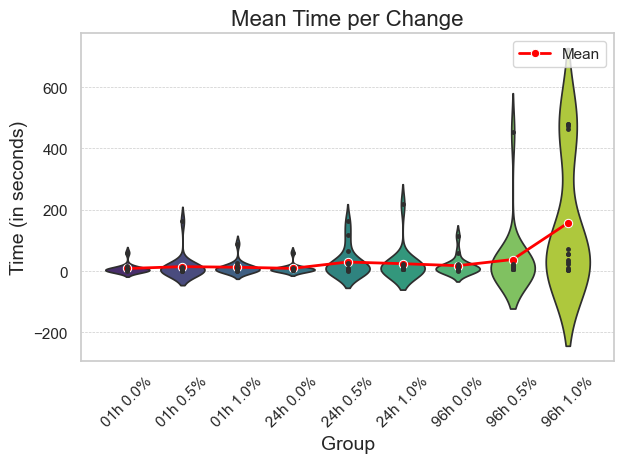

In [25]:
mtpc_means = box.groupby('group')['mtpc'].mean().reset_index()

sns.violinplot(data=box, x='group', y='mtpc', palette='viridis', hue='group', inner='point')
sns.lineplot(data=mtpc_means, x='group', y='mtpc', color='red', marker='o', label='Mean', linewidth=2)

plt.title('Mean Time per Change', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Time (in seconds)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()

In [26]:
# mean time per change shows us that fish were jumping into the bright environment real quick and returning to the dark, until higher dose-time exposures